# Méthode de Levenberg-Marquardt


## Introduction

Les données expérimentales suivent très rarement la théorie de manière parfaite. Elles subissent à plusiers facteures externes qui introduisent de l'imprécision dans les mesures. Si ces imprécisions sont aléatoires, nos données sont alors brutées. Dans ce cas, notre but est de retrouver les paramètres qui définisssent la fonction suivie par les données et éliminer donc l'influence de bruit.

Dans ce TP, on va utiliser une méthode d'optimisation de données qui s'appelle la méthode de Levenberg-Marquardt. Cette dernière utilise les méthodes de descente d'orde 1 et d'ordre 2.

## Régression non-linéaire 

On va étudier une régression non-linéaire. 

Il peut être fatiguant de calculer les dérivées d'ordre 2. Pour cet exercice, il nous suffit d'utiliser l'approximation de Gauss-Newton qui simplifie la problématique dans un contexte de minimisation de moindres carrés comme on l'a dans ce cas.

## Cas mono-exponentiel

On va supposer que $g(x) = e^{−ax}$ avec $a ∈ R$. On va donc faire une simple régression non-linéaire sur un espace de dimension $1$.

*Rappeler brièvement les avantages/inconvénients des méthodes de descente d’ordre 1 et 2 vues lors du précédent TP.*

La descente de gradient d'ordre 1 nous informe sur la direction de la descente. Elle n'est pas très sensible et donc on l'utilise surtout pour des fonction fortement décroissantes. Elle est assez simple et facile à implementer.
La descente de gradient d'ordre 2 est pratique pour trouver la courbure de la fonction $f$ au voisinage d'un point. Elle est plus sensible mais elle demande plus de temps d'éxécution à cause du calcul de la Héssienne. 

*Écrire la fonction $g$ qui prend en argument $x$ et $a$.*

In [2]:
# Imports from the matplotlib library
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def g(x,a):
    return np.exp(-a*x)

print(g(-1,1))

2.718281828459045


*Créer un jeu de données bruité sur l’intervalle $x ∈ [0, 3]$, avec $a = 2.0$, tel que $y = g(a, x) + bN (0, 1)$ avec $b$ un paramètre faisant varier l’amplitude d’un bruit de distribution normale. Prendre un pas de $0.01$ pour $x$. Utiliser la fonction randn de la librairie numpy.random.*

*Tracer les données simulées avec la fonction pyplot de la librairie matplotlib.*

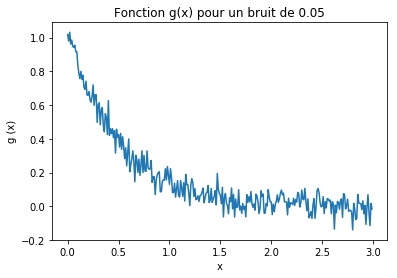

In [8]:
x = np.arange(0,3,0.01)
def yf(x,a,b):

    y = []
    for i in range(len(x)):
        y.append(g(x[i],a) + b*np.random.randn())
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('g (x)')
    plt.title('Fonction g(x) pour un bruit de ' + str(b))
    plt.show()
    return y
y = yf(x, 2,0.05)

*Écrire la fonction de coût $f$ qui prend en entrée $x$, $y$ et $a$*

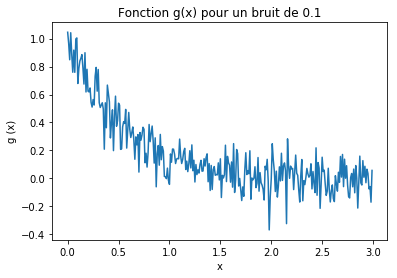

1.68703733867991

In [9]:
def price(x, y, a):
    res = []
    for i in range(len(x)):
        res.append((y[i] - g(x[i],a))**2)
        
    return 0.5*np.sum(res)

x = np.arange(0,3,0.01)
y = yf(x,2,0.1)
a = 2

price(x,y,a)

*Écrire la fonction qui retourne le gradient de $f$ par rapport à $a$*

In [10]:
def gradient(x, y, a) :
    res = []
    for i in range(len(x)):
        res.append((y[i]-g(x[i],a))*np.exp(-a*x[i])*(-x[i]))
    return -np.sum(res)

gradient(x,y,a)

0.2956547433081828

*Écrire la fonction qui retourne les dérivées d’ordre 2 de f . Utiliser l’approximation de Gauss-Newton.*

In [11]:
def Gauss_Newton(x,y,a):
    return np.sum(gradient(x,y,a)*gradient(x,y,a))
    
Gauss_Newton(x,y,a)    

0.08741172724062747

*Implémenter l’algorithme de Levenberg-Marquardt*

In [19]:
def Levenberg_Marquardt(x, y, niter, p):
        
    a  = 1.5
    lam = 0.001
    n = 0
    while n < niter :
        grad = gradient(x,y,a)
        sec_dev = Gauss_Newton(x, y, a)
        hlm = sec_dev*(1 + lam)
        dlm = -grad/hlm
        f = price(x, y, a)
        new_f = price(x, y, a + dlm)
        if new_f < f:
            a += dlm
            lam = lam/10
        else:
            lam *= 10
        if p:
            print('Iteration: ' + str(n) + '\t' + 'a = ' + str(a) +'\t' + 'lambda = ' + str(lam) + '\t' +'gradient = ' + str(abs(grad)) +'\t' + 'f = ' + str(f))
        n += 1
    return a
                
Levenberg_Marquardt(x,y,50, True)         
        
    

Iteration: 0	a = 1.8842138486948665	lambda = 0.0001	gradient = 2.600117102479515	f = 2.121278622295482
Iteration: 1	a = 1.8842138486948665	lambda = 0.001	gradient = 0.10525776222437822	f = 1.674965481595688
Iteration: 2	a = 1.8842138486948665	lambda = 0.01	gradient = 0.10525776222437822	f = 1.674965481595688
Iteration: 3	a = 1.8842138486948665	lambda = 0.1	gradient = 0.10525776222437822	f = 1.674965481595688
Iteration: 4	a = 1.8842138486948665	lambda = 1.0	gradient = 0.10525776222437822	f = 1.674965481595688
Iteration: 5	a = 1.8842138486948665	lambda = 10.0	gradient = 0.10525776222437822	f = 1.674965481595688
Iteration: 6	a = 1.8842138486948665	lambda = 100.0	gradient = 0.10525776222437822	f = 1.674965481595688
Iteration: 7	a = 1.8842138486948665	lambda = 1000.0	gradient = 0.10525776222437822	f = 1.674965481595688
Iteration: 8	a = 1.8937048446830904	lambda = 100.0	gradient = 0.10525776222437822	f = 1.674965481595688
Iteration: 9	a = 1.8937048446830904	lambda = 1000.0	gradient = 0.06814

1.911701065951251

*Étudier l’évolution des paramètres de l’algorithme ($λ$, norme du gradient, valeur de la $f$) au fur et à mesure
des itérations. Commenter.*

On étudie l'évolution des paramètres avec 50 iterations. 
Le coefficient $a$ s'établit directement sur une valeur assez proche ($1.884$) de la valeur exacte ($2.0$) et continue à augmenter lègerement jusqu'à la fin ($a = 1.9117$). La valeur exacte est impossible de trouver à cause du bruit.
Le paramètre $\lambda$ augmente pour la plupart des iterations.
Le gradient descend brusquement dès la deuxième itération. Ensuite, il continue à legèrement descendre. 
La fonction de coût arrive vers une valeur quasi-exacte dès la deuxième itération.

*Faire varier l’amplitude du bruit dans le jeu de données créé (paramètre $b$). Étudier l’influence sur la convergence de l’algorithme.*

Plus de bruit, plus l'approximation n'est pas précise.

*Tracer sur le même graphe le jeu de données ainsi que la fonction $g(x, a)$ optimale pour les valeurs de bruit testées.*

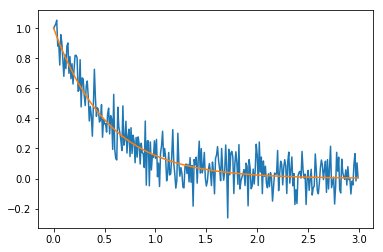

In [32]:
plt.plot(x, y)
plt.plot(x, g(x, Levenberg_Marquardt(x, y, 100)))
plt.xlabel('x')
plt.ylabel('g (x)')
plt.title('Optimisation de g(x) pour un bruit de 0.01')
plt.show()

## Cas bi-exponentiel

On étudie maintenant le cas ou $f$ va de $R^2$ dans $R$ i.e. pour une fonction g ayant deux paramètres en entrée. On pose $g(x, a) = x^{a_1}e^{−a_2x}$ avec $a = [a_1, a_2]$.

*Définir comme précédemment la fonction $g$, un jeu de données bruité (pour $x ∈ [0, 5], a_1 = 2.0$ et $a_2 = 3.0$), et la fonction $f$.*

In [43]:
def g(x,a):
    return np.exp(-a[1]*x)*x**a[0]

print(g(-1,[1,1]))

-2.718281828459045


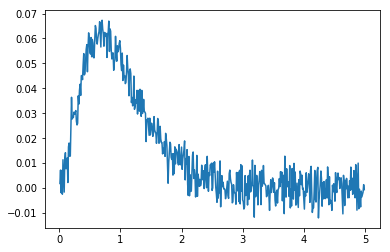

In [65]:
x = np.arange(0.01,5,0.01)
y = yf(x, [2,3], 0.005)
a = [2,3]

On remarque que la fonction ne suit plus une décroissance exponentielle mais elle forme un pique, il s'agit bien d'une biexponentielle. On calcule de nouveau sa fonction de coût.

In [66]:
price(x,y,a)

0.0060299062038333805

*Calculer le gradient de $f$ par rapport à $a$.*

In [87]:
def bi_gradient(x, y, a) :
    df1 = -np.sum((y-g(x,a))*np.log(x)*np.exp(a[0]*np.log(x)-a[1]*x))
    df2 = -np.sum((y-g(x,a))*(-x*x**a[0]*np.exp(-a[1]*x)))
    return [df1,df2]

bi_gradient(x,y,a)

[0.0004016396852546128, 0.0026759290874815173]

*Calculer la matrice des dérivées secondes avec l’approximation de Gauss-Newton. Indication: on peut utiliser la fonction dot de numpy pour calculer un produit scalaire.*

In [88]:
def bi_Gauss_Newton(x,y,a):
    d2a1 = np.sum((np.log(x)*np.exp(a[0]*np.log(x)-a[1]*x))**2)
    d2a12 = np.sum((np.log(x)*np.exp(a[0]*np.log(x)-a[1]*x))*(-x*x**a[0]*np.exp(-a[1]*x)))
    d2a2 = np.sum((-x*x**a[0]*np.exp(-a[1]*x))**2)
    return [[d2a1,d2a12],[d2a12,d2a2]]
    
bi_Gauss_Newton(x,y,a)    

[[0.09349203294680572, 0.02202722193930061],
 [0.02202722193930061, 0.2572016151788742]]

*Faire tourner l’algorithme de Levenberg-Marquardt pour en déduire le vecteur $a$ optimal (initialisation de $a$ à $[1.5,1.5]$). Indication: pour calculer l’inverse d’une matrice, utiliser la fonction inv() du package numpy.linalg.*

In [89]:
def bi_Levenberg_Marquardt(x, y, niter):
        
    a  = [1.5,1.5]
    lam = 0.001
    n = 0
    while n < niter :
        grad = bi_gradient(x,y,a)
        sec_dev = bi_Gauss_Newton(x, y, a)
        
        hlm = [[0,0],[0,0]]
        hlm[0][0] = sec_dev[0][0]*(1 + lam)
        hlm[1][1] = sec_dev[1][1]*(1 + lam)
        hlm[0][1] = sec_dev[0][1] 
        hlm[1][0] = sec_dev[0][1]
        dlm = -np.dot(grad,np.linalg.inv(hlm))
        f = price(x, y, a)
        new_f = price(x, y, a + dlm)
        if new_f < f:
            a += dlm
            lam = lam/10
        else:
            lam *= 10
        n += 1
        #print(a, lam)
    return a
                
bi_Levenberg_Marquardt(x,y,1000)     

array([1.99799349, 2.98988661])

*Étudier l’évolution des paramètres de l’algorithme ($λ$, norme du gradient, valeur de la $f$) au fur et à mesure des itérations. Commenter et tester pour plusieurs amplitudes de bruit.*

*Afficher les résultats avec matplotlib pour plusieurs amplitudes de bruit.*

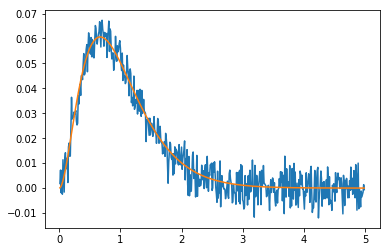

In [90]:
plt.plot(x, y)
plt.plot(x, g(x, bi_Levenberg_Marquardt(x, y, 1000)))
plt.xlabel('x')
plt.ylabel('g (x)')
plt.title('Optimisation de g(x) pour un bruit de 0.005')
plt.show()

In [ ]:
y2 = yf(x, [2,3], 0.05)
plt.plot(x, y2)
plt.plot(x, g(x, bi_Levenberg_Marquardt(x, y2, 1000)))
plt.xlabel('x')
plt.ylabel('g (x)')
plt.title('Optimisation de g(x) pour un bruit de 0.05')
plt.show()

In [ ]:
y3 = yf(x, [2,3], 0.1)
plt.plot(x, y3)
plt.plot(x, g(x, bi_Levenberg_Marquardt(x, y3, 1000)))
plt.xlabel('x')
plt.ylabel('g (x)')
plt.title('Optimisation de g(x) pour un bruit de 0.1')
plt.show()

*Conclure sur les avantages de la méthode de Levenberg-Marquardt en faisant le lien avec la question 3.1.*

## Conclusion

Ce TP nous a permis d'étudier un outil d'optimisation de données - la méthode de Lévenberg-Marquardt. Elle permet de retrouver les paramètres d'une fonction bruitée ou les paramètres de la loi suivie par des données expérimentale ce qui peut être un outil puissant de l'analyse de données. Notre étude a été faite sur la fonction exponentielle et bi-exponentielle avec des résultats satisfaisants. Dans le cas d'exponetielle, l'approximation a bien marché même pour un coefficient de bruit plutôt élevé ($0.1$). La bi-exponetielle est plus sensible au bruit à cause du produit à l'intérieur de la fonction, néanmoins avec un coefficient de bruit approprié ($0.05$) on obtient des résulats corrects. Pour conclure, on voit bien l'utilité de cette méthode d'optimisation ainsi que ses limites.  